In [49]:
import pandas as pd
pd.set_option('display.max_rows', 300)
import matplotlib.pyplot as plt

In [2]:
bkrydf = pd.read_csv('frenchbakerydata.csv')

In [4]:
bkrydf.tail()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
234000,511387,30/09/2022,18:52,288911,COUPE,1,"0,15 €"
234001,511388,30/09/2022,18:52,288911,BOULE 200G,1,"1,20 €"
234002,511389,30/09/2022,18:52,288911,COUPE,2,"0,15 €"
234003,511392,30/09/2022,18:55,288912,TRADITIONAL BAGUETTE,1,"1,30 €"
234004,511395,30/09/2022,18:56,288913,TRADITIONAL BAGUETTE,1,"1,30 €"


In [6]:
bkrydf.dtypes

Unnamed: 0        int64
date             object
time             object
ticket_number     int64
article          object
Quantity          int64
unit_price       object
dtype: object

In [9]:
bkrydf.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


In [11]:
bkrydf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     234005 non-null  int64 
 1   date           234005 non-null  object
 2   time           234005 non-null  object
 3   ticket_number  234005 non-null  int64 
 4   article        234005 non-null  object
 5   Quantity       234005 non-null  int64 
 6   unit_price     234005 non-null  object
dtypes: int64(3), object(4)
memory usage: 12.5+ MB


In [12]:
missing_values = bkrydf.isnull().sum()

In [13]:
print(missing_values)

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64


In [14]:
print(bkrydf.head)

<bound method NDFrame.head of         Unnamed: 0        date   time  ticket_number               article  \
0                0  02/01/2021  08:38         150040              BAGUETTE   
1                1  02/01/2021  08:38         150040      PAIN AU CHOCOLAT   
2                4  02/01/2021  09:14         150041      PAIN AU CHOCOLAT   
3                5  02/01/2021  09:14         150041                  PAIN   
4                8  02/01/2021  09:25         150042  TRADITIONAL BAGUETTE   
...            ...         ...    ...            ...                   ...   
234000      511387  30/09/2022  18:52         288911                 COUPE   
234001      511388  30/09/2022  18:52         288911            BOULE 200G   
234002      511389  30/09/2022  18:52         288911                 COUPE   
234003      511392  30/09/2022  18:55         288912  TRADITIONAL BAGUETTE   
234004      511395  30/09/2022  18:56         288913  TRADITIONAL BAGUETTE   

        Quantity unit_price  
0  

In [17]:
bkrydf=bkrydf[bkrydf['Quantity'] >= 0]
print(bkrydf.describe())

          Unnamed: 0  ticket_number       Quantity
count  232710.000000  232710.000000  232710.000000
mean   255097.933935  219172.127279       1.556396
std    147552.040205   40066.965891       1.197990
min         0.000000  150040.000000       1.000000
25%    127873.750000  184727.250000       1.000000
50%    254083.500000  218674.500000       1.000000
75%    383068.250000  253972.750000       2.000000
max    511395.000000  288913.000000     200.000000


In [18]:
# deleting first unnamed column
bkrydf = bkrydf.iloc[:, 1:]

In [19]:
# Lets check how many unique articles the bakery is selling
len(bkrydf.article.unique())

149

In [20]:
# Showing rows which article starts with 'Plat'  
bkrydf[bkrydf.article.str.startswith('PLAT')]

,date,time,ticket_number,article,Quantity,unit_price
62799,12/07/2021,08:25,187148,"PLATPREPARE6,50",1,"0,00 €"
63036,12/07/2021,11:30,187296,"PLATPREPARE6,50",2,"6,50 €"
63037,12/07/2021,11:30,187296,"PLATPREPARE5,50",1,"5,50 €"
63078,12/07/2021,11:52,187322,"PLATPREPARE7,00",3,"7,00 €"
63555,13/07/2021,10:35,187606,"PLATPREPARE7,00",4,"7,00 €"
...,...,...,...,...,...,...
233796,30/09/2022,10:50,288790,PLAT 7.60E,1,"7,60 €"
233817,30/09/2022,11:09,288801,PLAT 7.60E,1,"7,60 €"
233888,30/09/2022,12:19,288845,PLAT 8.30E,1,"8,30 €"
233889,30/09/2022,12:19,288845,PLAT 7.60E,1,"7,60 €"


In [21]:
# Checking how many unique articles starts with 'PLAT' 
bkrydf[bkrydf.article.str.startswith('PLAT')]['article'].unique()

array(['PLATPREPARE6,50', 'PLATPREPARE5,50', 'PLATPREPARE7,00',
       'PLATPREPARE6,00', 'PLAT 6.50E', 'PLAT 7.60E', 'PLAT 7.00', 'PLAT',
       'PLAT 8.30E'], dtype=object)

In [23]:
# cleaning up unit_price feature to remove 'Euro' sign and change comma to dots

# Splitting the string and selecting first element

price = bkrydf['unit_price'].str.replace(' €', '')
bkrydf['unit_price'] = price.replace(',', '.', regex=True).astype('float')

In [24]:
bkrydf.head(3)

,date,time,ticket_number,article,Quantity,unit_price
0,02/01/2021,08:38,150040,BAGUETTE,1,0.9
1,02/01/2021,08:38,150040,PAIN AU CHOCOLAT,3,1.2
2,02/01/2021,09:14,150041,PAIN AU CHOCOLAT,2,1.2


In [26]:
# Adding revenue column

bkrydf['revenue'] = bkrydf['Quantity'] * bkrydf['unit_price']

In [27]:
bkrydf.head(3)

,date,time,ticket_number,article,Quantity,unit_price,revenue
0,02/01/2021,08:38,150040,BAGUETTE,1,0.9,0.9
1,02/01/2021,08:38,150040,PAIN AU CHOCOLAT,3,1.2,3.6
2,02/01/2021,09:14,150041,PAIN AU CHOCOLAT,2,1.2,2.4


In [43]:
# check articles with lowest sales 
bkry_low_sales_art = bkrydf.groupby('article').sum(numeric_only=True).sort_values('revenue')

In [32]:
# Finding out the most valuable baguette
(bkrydf[bkrydf.article.str.contains('BAGU')].groupby('article').sum(numeric_only=True).sort_values('Quantity', ascending=False))

,ticket_number,Quantity,unit_price,revenue
article,,,,
TRADITIONAL BAGUETTE,14843612190,118093,82980.75,145533.75
BAGUETTE,3320439141,22156,14145.45,20578.20
CEREAL BAGUETTE,1057515747,7478,6293.60,9538.05
BAGUETTE GRAINE,323051101,1871,1986.85,2481.20
DEMI BAGUETTE,250546664,1146,537.60,538.95
BAGUETTE APERO,14289252,69,297.00,310.50


In [38]:
bkrydf['date'] = pd.to_datetime(bkrydf['date'])

C:\Users\Maria Guevara\AppData\Local\Temp\ipykernel_2064\3236915878.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bkrydf['date'] = pd.to_datetime(bkrydf['date'])


In [39]:
# introducing weekdays into the dataset
bkrydf['weekday'] = pd.Categorical(bkrydf.date.dt.day_name(), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [40]:
# Now lets see how many orders were made in avg / day each week
date_weekdays = bkrydf.drop_duplicates('date')[['date', 'weekday']]

In [44]:
tickets_by_day = (bkrydf.drop_duplicates('ticket_number')
                   .groupby('date')['ticket_number']
                   .count()
                   .reset_index()
                   .merge(date_weekdays)
                   .groupby('weekday')
                   .mean('ticket_number'))


In [45]:
tickets_by_day

,ticket_number
weekday,
Monday,222.448276
Tuesday,216.069767
Wednesday,213.148649
Thursday,218.738636
Friday,215.233333
Saturday,230.431818
Sunday,265.287356


<Axes: xlabel='weekday'>

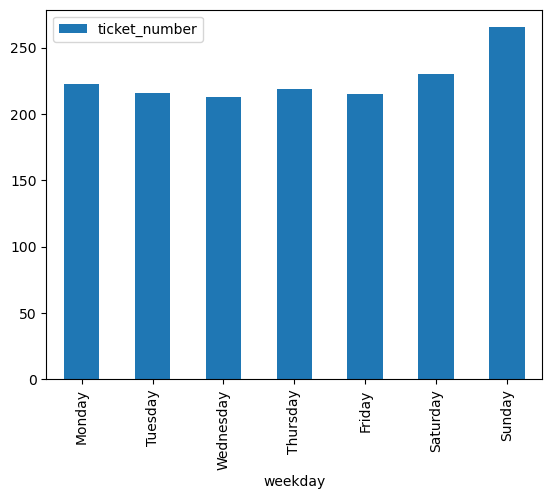

In [46]:
tickets_by_day.plot(kind='bar')

In [50]:
# Now lets see how much of each article was sold

(bkrydf
    .groupby(['date', 'article'])['Quantity']
    .count()
    .reset_index()
    .groupby('article')['Quantity']
    .sum()
    .sort_values(ascending=False)
)

article
TRADITIONAL BAGUETTE        67349
COUPE                       20386
BAGUETTE                    15225
BANETTE                     15020
CROISSANT                   11448
PAIN AU CHOCOLAT            10526
SPECIAL BREAD                5164
CEREAL BAGUETTE              4934
FORMULE SANDWICH             4121
BOULE 400G                   4075
CAMPAGNE                     3895
VIK BREAD                    3130
COMPLET                      3129
MOISSON                      3093
TARTELETTE                   2844
BANETTINE                    2806
PAIN BANETTE                 2717
BOULE 200G                   2679
FICELLE                      2634
SANDWICH COMPLET             2188
ECLAIR                       1994
COOKIE                       1992
PAIN AUX RAISINS             1984
PAIN                         1908
CROISSANT AMANDES            1797
BRIOCHE                      1649
BAGUETTE GRAINE              1497
SAND JB EMMENTAL             1488
PAIN CHOCO AMANDES           1476
BOISSO

In [54]:
# Avg # of articles sold / day

avg_sold_p_day = (bkrydf
    .groupby(['date', 'article'])['Quantity']
    .count() # sum of each article sold / day
    .reset_index()
    .groupby('article')['Quantity']
    .mean()
    .sort_values(ascending=False)
)


In [53]:
avg_sold_p_day[:10]

article
TRADITIONAL BAGUETTE    112.248333
COUPE                    33.976667
BAGUETTE                 25.375000
BANETTE                  25.033333
CROISSANT                19.111853
PAIN AU CHOCOLAT         17.602007
SPECIAL BREAD             8.635452
VIK BREAD                 8.575342
CEREAL BAGUETTE           8.292437
FORMULE SANDWICH          7.589319
Name: Quantity, dtype: float64

<Axes: xlabel='article'>

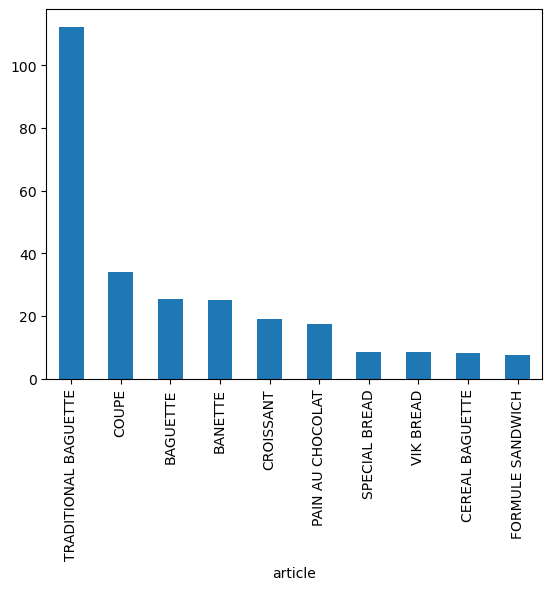

In [55]:
avg_sold_p_day[:10].plot(kind='bar')